# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 



<hr style="height:2pt">

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [2]:
dftaxi = pd.read_csv("dataset_1.csv")
dftaxi.head(10)

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0
5,639.0,37.0
6,819.0,28.0
7,883.0,35.0
8,690.0,27.0
9,68.0,95.0


In [3]:
dftaxi.shape

(1250, 2)

In [4]:
train_data, test_data = train_test_split(dftaxi, test_size = 0.2, random_state = 42)

**1.2**

In [5]:
x_train = train_data.TimeMin
y_train = train_data.PickupCount

In [6]:
print(x_train.shape)
print(y_train.shape)

(1000,)
(1000,)


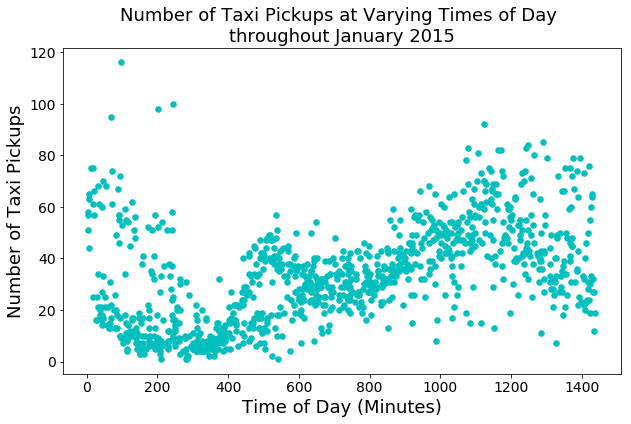

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.tick_params(labelsize=14)

ax.scatter(x_train, y_train, s = 30, c = 'c')

ax.set_xlabel('Time of Day (Minutes)', fontsize = 18)
ax.set_ylabel('Number of Taxi Pickups', fontsize = 18)
ax.set_title('Number of Taxi Pickups at Varying Times of Day \nthroughout January 2015', fontsize = 18);

**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

Yes, the number of taxi pickups does make intuitive sense to me. At 12:00am (0 minutes), we see a spread of pickups, between 18 and 80. At this time of night, most people are probably not commuting, but some people are either coming home from a night out or getting off restaurant or hospital shifts (hence the spread). That number slowly tapers off into minimal pickups (comparatively speaking) to a cluster between 5:30am and 6:00am (330-360 minutes). The taxi pickups start increasing again after that due to rush hour and people starting their1200 days. They steadily increase throughout the day and into the night, with a peak around 8pm (1200 minutes). The majority of the pickups start to taper down as people head home for the night (although there are still some pickups, which can be accounted for in the same manner as the 12am pickups).

Some considerations to keep in mind when analyzing these data:

1) Since they were collected throughout one month, I assume the data include pickups from both the week and the weekend. I suspect that the weekend data may have more pickups late at night than during the week and could contribute to some of the later night pickups. (But given that New York is the city that never sleeps, perhaps weekend pickups aren't that different from weekday pickups?) 

2) A huge blizzard occurred in the Northeast towards the end of January 2015. I don't think it hit New York as hard as Boston, but there was still a state of emergency, which definitely could impact the collection of and/or the data themselves. The impacts of the blizzard after it occurred also likely impacted taxi pickups. I'm not sure if this would either increase pickups because people don't want to drive themselves (and/or the subway wasn't open) or if this would decrease pickups because people didn't want to be out in the snow.

<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [8]:
X_train = x_train.values.reshape(-1,1)
X_train.shape

(1000, 1)

In [9]:
KNNModels = {}
for k in [1, 10, 75, 250, 500, 750, 1000]:
    knnreg = KNeighborsRegressor(n_neighbors = k)
    knnreg.fit(X_train, y_train)
    KNNModels[k] = knnreg

**2.2**

In [10]:
x_test = test_data.TimeMin
y_test = test_data.PickupCount

In [11]:
print(x_test.shape)
print(y_test.shape)

(250,)
(250,)


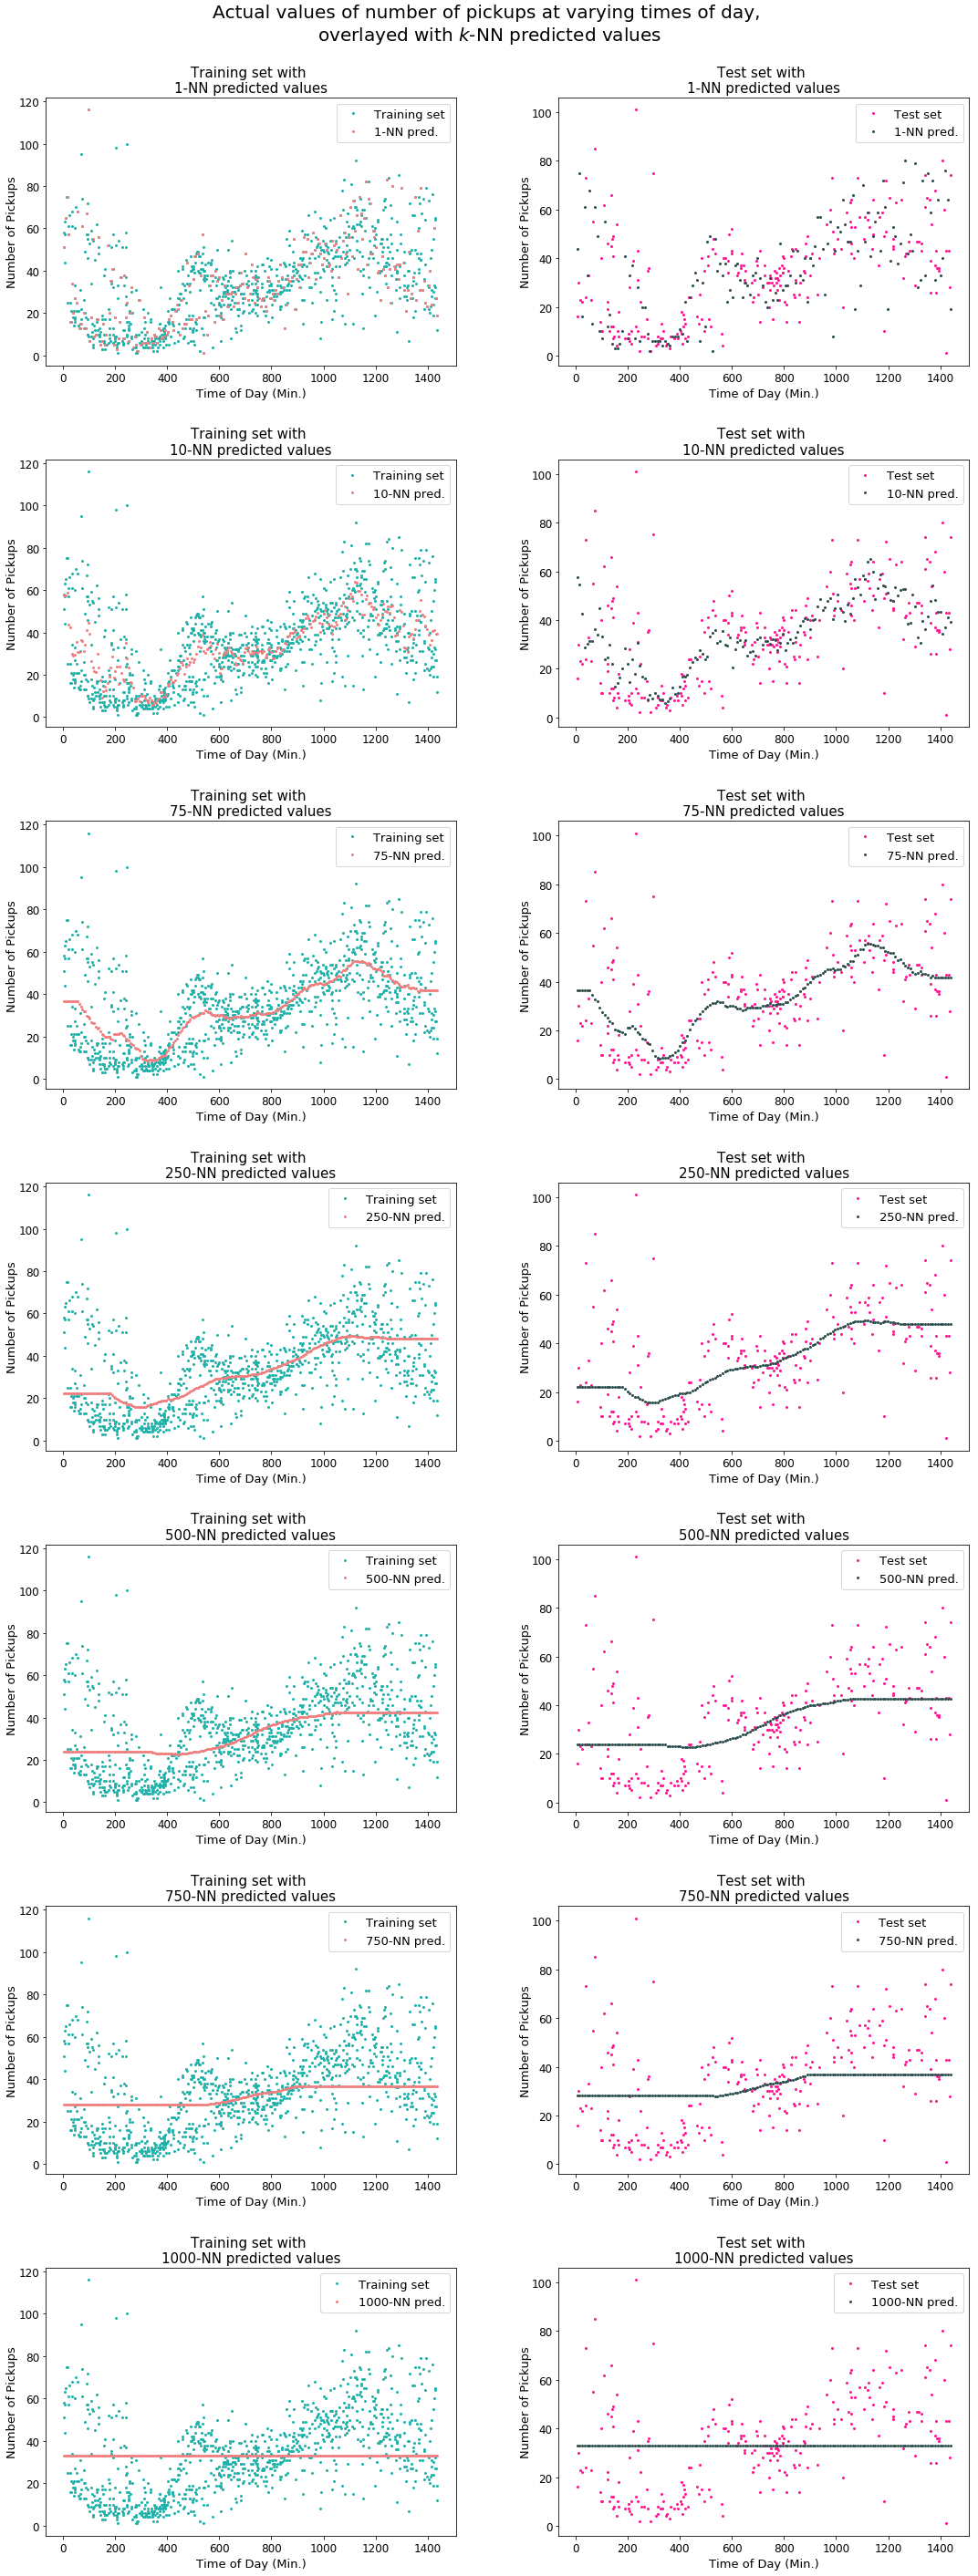

In [12]:
fig, axs = plt.subplots(7, 2, figsize = (15, 40))

xtrain_grid = np.linspace(np.min(x_train), np.max(x_train), 250)
xtest_grid = np.linspace(np.min(x_test), np.max(x_test), 150)

i = 0
for k in [1, 10, 75, 250, 500, 750, 1000]:
    axs[i, 0].plot(x_train, y_train, 'o', label = 'Training set', markersize = 2, c = 'lightseagreen')
    axs[i, 1].plot(x_test, y_test, 'o', label = 'Test set', markersize = 2, c = 'deeppink')
    predictions_train = KNNModels[k].predict(xtrain_grid.reshape(250,1))
    axs[i, 0].plot(xtrain_grid, predictions_train, 'o', label = "{}-NN pred.".format(k), 
                   markersize = 2, c = 'lightcoral')
    axs[i, 0].legend(loc = 'best', fontsize = 13)
    axs[i, 0].set_xlabel('Time of Day (Min.)', fontsize = 13) 
    axs[i, 0].set_ylabel('Number of Pickups', fontsize = 13, labelpad = 0.1)
    axs[i, 0].set_title("Training set with \n{}-NN predicted values".format(k), fontsize = 15)
    axs[i, 0].tick_params(labelsize = 12)
    predictions_test = KNNModels[k].predict(xtest_grid.reshape(150,1))
    axs[i, 1].plot(xtest_grid, predictions_test, 'o', label = "{}-NN pred.".format(k), 
                   markersize = 2, c = 'darkslategrey')
    axs[i, 1].legend(loc = 'best', fontsize = 13)
    axs[i, 1].set_xlabel('Time of Day (Min.)', fontsize = 13); 
    axs[i, 1].set_ylabel('Number of Pickups', fontsize = 13, labelpad = 0.1)
    axs[i, 1].set_title("Test set with \n{}-NN predicted values".format(k), fontsize = 15)
    axs[i, 1].tick_params(labelsize = 12)
    i = i + 1

fig.suptitle('Actual values of number of pickups at varying times of day, \noverlayed with $k$-NN predicted values',
            fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top = 0.945, hspace = .35, wspace = .25)

**2.3**

In [13]:
X_test = x_test.values.reshape(-1, 1)

scores_train = []
scores_test = []
for k in [1, 10, 75, 250, 500, 750, 1000]:
    score_train = KNNModels[k].score(X_train, y_train)
    scores_train.append(score_train)
    score_test = KNNModels[k].score(X_test, y_test)
    scores_test.append(score_test)

In [14]:
print(scores_train)
print(scores_test)

[0.7123359249551393, 0.5098253543055764, 0.4453919898034398, 0.35531377106191797, 0.29032710753986246, 0.17943381356152266, 0.0]
[-0.418931841502846, 0.2720679800405935, 0.39030979691560475, 0.3403408367444192, 0.2703208352566887, 0.16490939267081106, -0.0003843303764170524]


In [15]:
r2_df = pd.DataFrame({r'$k$ value': [1, 10, 75, 250, 500, 750, 1000],
                     'Training Set R^2 Scores': scores_train,
                     'Test Set R^2 Scores': scores_test})

In [16]:
print('Table of R^2 values for training and test data')
r2_df

Table of R^2 values for training and test data


,$k$ value,Training Set R^2 Scores,Test Set R^2 Scores
0,1,0.712336,-0.418932
1,10,0.509825,0.272068
2,75,0.445392,0.390310
3,250,0.355314,0.340341
4,500,0.290327,0.270321
5,750,0.179434,0.164909
6,1000,0.000000,-0.000384


**2.4**

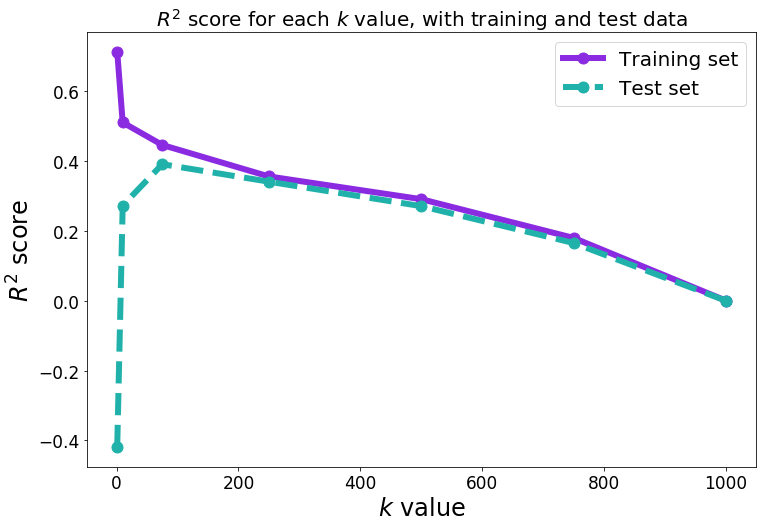

In [17]:
ks = [1, 10, 75, 250, 500, 750, 1000]

fig, ax = plt.subplots(1, 1, figsize = (12,8))

ax.plot(ks, scores_train,'o-', markersize = 11, lw = 6, c = 'blueviolet', label = 'Training set')
ax.plot(ks, scores_test, 'o--', markersize = 11, lw = 6, c = 'lightseagreen', label = 'Test set')

ax.tick_params(labelsize = 17)

ax.set_xlabel(r'$k$ value', fontsize = 24)
ax.set_ylabel(r'$R^{2}$ score', fontsize = 24)

ax.set_title(r'$R^{2}$ score for each $k$ value, with training and test data', fontsize = 20)

ax.legend(loc = 'best', fontsize = 20);

**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  

    A k-NN regression model that uses $k = n$ has an $R^2$ score close to, if not zero. This is because this k-NN model will return the mean value of the observations. An $R^2$ score of zero means the model is just as good as taking the average values of the observations as your prediction.
    
    
2. *What does an $R^2$ score of $0$ mean?*

    An $R^2$ score of 0 means that the model did not explain any of the variability in the response. The model is as good as the mean value of the responses. (The residual sum of squares are the same as the total sum of squares.)
    
    

3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*

    A negative $R^2$ score means that the model is worse than than the mean value of the responses. We see this in the $R^2$ calculated on the test set, for $k$ = 1 and $k$ = 1000. For a negative $R^2$ to occur, the residual sum of squares must be larger than the total sum of squares.
    
    
       
4. *Do the training and test $R^2$ plots exhibit different trends?  Describe.*  

    The training and test start off with very different $R^2$ values. The $R^2$ of the training set starts at 0.71 while the test set starts at -0.42. The training $R^2$ score starts to decrease as more neighbors are included in the model, while the test set $R^2$ score begins to increase. The two scores actually begin to "meet" at k = 75, with $R^2$ scores starting to get closer together(training = 0.45, test = 0.39). At k =75, the $R^2$ is maximized for the test data. After k = 75, both data sets decline together, with their lowest $R^2$ at k = n = 1000.
    
        
5. *How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*

    The fit of the model is best at $k$ = 75. The $R^2$ score of the test values is maximized there ($R^2$=0.39), and the $R^2$ score of the training data is 0.45. For the training data, the best $R^2$ score is when k = 1, while that is when the test data exhibits its worst $R^2$ score. As the $k$ values increase beyond 75, the fit of the model decreases, as can be seen in the decreasing $R^2$ values of both the training and test datasets.
    
    
6. *What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*

    The best value of $k$ is 75. The $R^2$ values are 0.39 for the test data and 0.45 for the training data.
    

<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [18]:
Xtrain_sm = sm.add_constant(X_train)

taxireg_sm = OLS(y_train, Xtrain_sm)

OLSModel = taxireg_sm.fit()

In [19]:
OLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           2.34e-62
Time:                        23:29:58   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.000      14.675      18.826
x1             0.0233      0.001     17.900      0.000       0.021       0.026
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.910
Skew:                           1.111   Prob(JB):                    3.02e-101
Kurtosis:                       5.485   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.2**

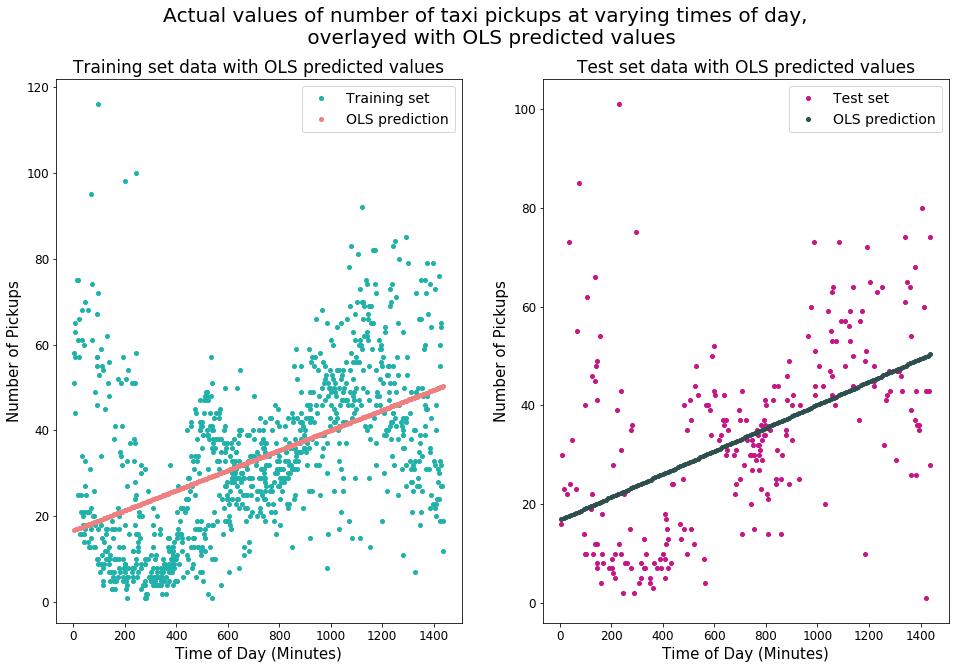

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 10))

# use xtrain_grid and xtest_grid from previous plot (2.2) to generate this plot

Xtrain_grid = sm.add_constant(xtrain_grid)
Xtest_grid = sm.add_constant(xtest_grid)

pred_train = OLSModel.predict(Xtrain_grid)
pred_test = OLSModel.predict(Xtest_grid)

ax1.plot(x_train, y_train, 'o', label = 'Training set', markersize = 4, c = 'lightseagreen')
ax1.plot(xtrain_grid, pred_train, 'o', label = 'OLS prediction', markersize = 4, c = 'lightcoral')
ax1.legend(loc = 'best', fontsize = 14)
ax1.set_xlabel('Time of Day (Minutes)', fontsize = 15); 
ax1.set_ylabel('Number of Pickups', fontsize = 15)
ax1.set_title("Training set data with OLS predicted values", fontsize = 17)
ax1.tick_params(labelsize = 12)

ax2.plot(x_test, y_test, 'o', label = 'Test set', markersize = 4, c = 'mediumvioletred')
ax2.plot(xtest_grid, pred_test, 'o', label = 'OLS prediction', markersize = 4, c = 'darkslategrey')
ax2.legend(loc = 'best', fontsize = 14)
ax2.set_xlabel('Time of Day (Minutes)', fontsize = 15); 
ax2.set_ylabel('Number of Pickups', fontsize = 15)
ax2.set_title("Test set data with OLS predicted values", fontsize = 17)
ax2.tick_params(labelsize = 12)

fig.suptitle('Actual values of number of taxi pickups at varying times of day, \n overlayed with OLS predicted values',
            fontsize = 20);

**3.3**

In [22]:
# can only calculate scores for both the test and the training set with sklearn
Xtest_sm = sm.add_constant(X_test)
ypred_train = OLSModel.predict(Xtrain_sm)
ypred_test = OLSModel.predict(Xtest_sm)

r2_test = r2_score(y_test, ypred_test)
print('r2_test: {0:6.4f}'.format(r2_test))

r2_train = r2_score(y_train, ypred_train)
print('r2_train: {0:6.4f}'.format(r2_train))

r2_test: 0.2407
r2_train: 0.2430


As you can see above, the $R^{2}$ values for the test and training data are extremely close/similar to each other.

**3.4**

In [23]:
beta = OLSModel.params
beta

const    16.750601
x1        0.023335
dtype: float64

In [24]:
print('The slope for the fitted linear model is {0:7.5f} and the intercept is {1:7.5f}.'
      .format(beta[1], beta[0]))

The slope for the fitted linear model is 0.02334 and the intercept is 16.75060.


**3.5**

In [25]:
conf = OLSModel.conf_int()
conf

,0,1
const,14.675141,18.826062
x1,0.020777,0.025893


In [26]:
conf_T = conf.T
conf_T

,const,x1
0,14.675141,0.020777
1,18.826062,0.025893


In [27]:
print('The 95% CI for the intercept is [{0:8.5f}, {1:8.5f}].'.format(conf_T.const.loc[0], conf_T.const.loc[1]))

The 95% CI for the intercept is [14.67514, 18.82606].


In [28]:
print('The 95% CI for the slope is [{0:7.5f}, {1:7.5f}].'.format(conf_T.x1.loc[0], conf_T.x1.loc[1]))

The 95% CI for the slope is [0.02078, 0.02589].


**3.6**

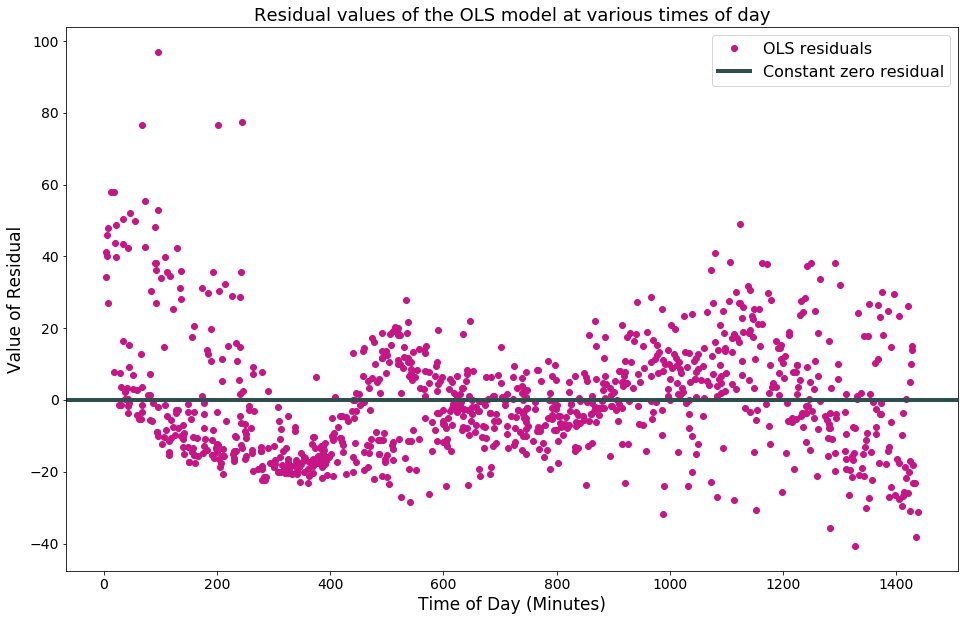

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (16,10))
residuals = OLSModel.resid

ax.plot(x_train, residuals, 'o', markersize = 6, c = 'mediumvioletred', label = 'OLS residuals')
ax.axhline(y = 0.0, c = 'darkslategrey', linestyle='-', lw = 4, label = 'Constant zero residual')
ax.legend(loc = 'best', fontsize = 16)
ax.set_xlabel('Time of Day (Minutes)', fontsize = 17); 
ax.set_ylabel('Value of Residual', fontsize = 17)
ax.set_title("Residual values of the OLS model at various times of day", fontsize = 18)
ax.tick_params(labelsize = 14);

**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

    The $R^2$ score of the linear regression on the test data is 0.24, which is lower than the $R^2$ of the 75-NN regression (best model) on the test data ($R^2$ = 0.39).
    

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

    The slope of the fitted linear model is positive, indicating that there is a positive correlation between Time of Day (X) and the Number of Pickups (Y). As X increases, so does Y. So as the day goes on, you'd expect to have more taxi pickups.
    

3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
    Yes, I do consider the estimates of the model parameters to be reliable. The respective 95% confidence intervals contain each of the parameter estimates. For linear regression, the 95% confidence interval is a range in which there is approximately a 95% chance that the true value will be contained. 
    

4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

    A 99% confidence interval would be looser than the 95% confidence interval. It includes a wider interval of values in which there is a 99% chance the true value could reside. 
    

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

    For the assumption of linearity to be valid, the residuals plot would have to appear random (ie the residuals would be random about the constant zero residual). However, this residuals plot doesn't appear to be random and seems to take on a non-horizontal shape (seems to curve from above the zero residual, to below, to back above, and finally ends below [like a stretched 'S', rotated 90 degrees to the left]).  Therefore, the assumption of linearity is not valid for these data.


<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers

**4.1**

In [30]:
class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        '''Takes endogenous and exogenous variables and instantiates model
        Args:
            endog: response training data; 
            exog: feature training data, with constant coefficient included (to fit intercept)
        Returns: 
            Instantiated linear regression model
        '''
        self.params = []              
        ## store exog and endog in instance variables
        if exog.shape < (len(exog), 2):
            exog = exog.values.reshape(-1, 1)
            exog = np.insert(exog, 0, np.repeat(1, len(exog)), axis = 1)
        else:
            exog = exog
        self.endog = np.array(endog)
        self.exog = np.array(exog)
  
                    
    def fit(self):
        '''Take instantiated model and fits parameters of linear regression
        Returns: self
        '''
        X = self.exog
        Y = self.endog
        self.params = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), Y)
        return self
            
    def predict(self, exog = None):
        '''Take self or another exogenous variable and predict response values
        Args: 
            exogenous variable (or self.exog if none given)
        Returns: 
            predicted values of response variable'''
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
        beta_0 = self.params[0]
        beta_1 = self.params[1]
        if exog is None:
            exog = self.exog
        else: 
            exog = exog
        X = exog
        return beta_0*X[:,0] + beta_1*X[:,1]       
                    
        
def CS109r2score(y_true, y_pred):
    '''Take actual response values and predicted response values and return R^2 score
    Args:
        y_true: actual response values (endogenous data); 
        y_pred: predicted response values from model
    Returns: 
        R^2 value'''
    y_true_mu = np.mean(y_true)
    RSS = np.sum((y_pred - y_true)**2)
    TSS = np.sum((y_true_mu - y_true)**2)
    return 1 - (RSS/TSS)

**4.2**

In [31]:
xtrain = train_data.TimeMin
Xtrain = sm.add_constant(xtrain)
ytrain = train_data.PickupCount

In [32]:
taxi_cs109 = CS109OLS(ytrain, Xtrain)
CS109OLSModel = taxi_cs109.fit()

Check that the class works as expected:

In [33]:
CS109OLSModel.params

array([16.75060143,  0.02333518])

The above values are the same values the OLSModel returned for slope and intercept.

In [34]:
CS109OLSModel.predict() # check that the function works on self (if no exog argument is passed)

array([26.17801241, 19.80750944, 18.73409136, 29.32826113, 46.29293385,
       45.73288964, 17.24064012, 43.39937207, 30.49501991, 18.64075066,
       48.39309967, 22.42104912, 16.86727731, 24.3578687 , 29.42160183,
       47.71637957, 28.86155761, 47.36635194, 40.92584344, 46.19959315,
       20.39088884, 26.38802899, 35.39540681, 37.37889674, 35.93211585,
       36.98219875, 34.20531285, 47.6930444 , 43.16602031, 45.68621929,
       34.53200531, 30.72837167, 27.15808979, 38.96568869, 34.99870882,
       42.37262434, 33.59859828, 24.33453353, 44.70614191, 48.08974238,
       39.31571632, 32.03514151, 42.06926705, 25.38461643, 47.59970369,
       44.21610322, 34.04196662, 27.6247933 , 21.65098832, 24.05451142,
       38.75567211, 39.3390515 , 40.66915651, 41.76590977, 21.6743235 ,
       25.38461643, 23.93783554, 20.50756471, 35.53541786, 19.73750392,
       40.87917309, 22.7244064 , 45.87290069, 25.991331  , 22.88775263,
       19.43414663, 48.22975344, 48.67312177, 33.62193345, 18.89

The above works! These match what the OLS model returns.

In [35]:
xtrain_grid = np.linspace(np.min(xtrain), np.max(xtrain), 250)
Xtrain_cs109grid = sm.add_constant(xtrain_grid)

In [36]:
Xtrain_cs109grid.shape

(250, 2)

In [37]:
CS109OLSModel.predict(Xtrain_cs109grid) # function works when exog argument is passed

array([16.84394213, 16.97833025, 17.11271837, 17.24710649, 17.38149461,
       17.51588273, 17.65027085, 17.78465897, 17.91904709, 18.05343521,
       18.18782333, 18.32221145, 18.45659957, 18.59098769, 18.72537581,
       18.85976393, 18.99415205, 19.12854017, 19.26292829, 19.39731642,
       19.53170454, 19.66609266, 19.80048078, 19.9348689 , 20.06925702,
       20.20364514, 20.33803326, 20.47242138, 20.6068095 , 20.74119762,
       20.87558574, 21.00997386, 21.14436198, 21.2787501 , 21.41313822,
       21.54752634, 21.68191446, 21.81630258, 21.9506907 , 22.08507882,
       22.21946694, 22.35385506, 22.48824318, 22.6226313 , 22.75701942,
       22.89140754, 23.02579566, 23.16018378, 23.2945719 , 23.42896002,
       23.56334814, 23.69773626, 23.83212438, 23.9665125 , 24.10090062,
       24.23528874, 24.36967686, 24.50406498, 24.6384531 , 24.77284123,
       24.90722935, 25.04161747, 25.17600559, 25.31039371, 25.44478183,
       25.57916995, 25.71355807, 25.84794619, 25.98233431, 26.11

**4.3**

In [38]:
xtest = test_data.TimeMin
Xtest = sm.add_constant(xtest)
ytest = test_data.PickupCount

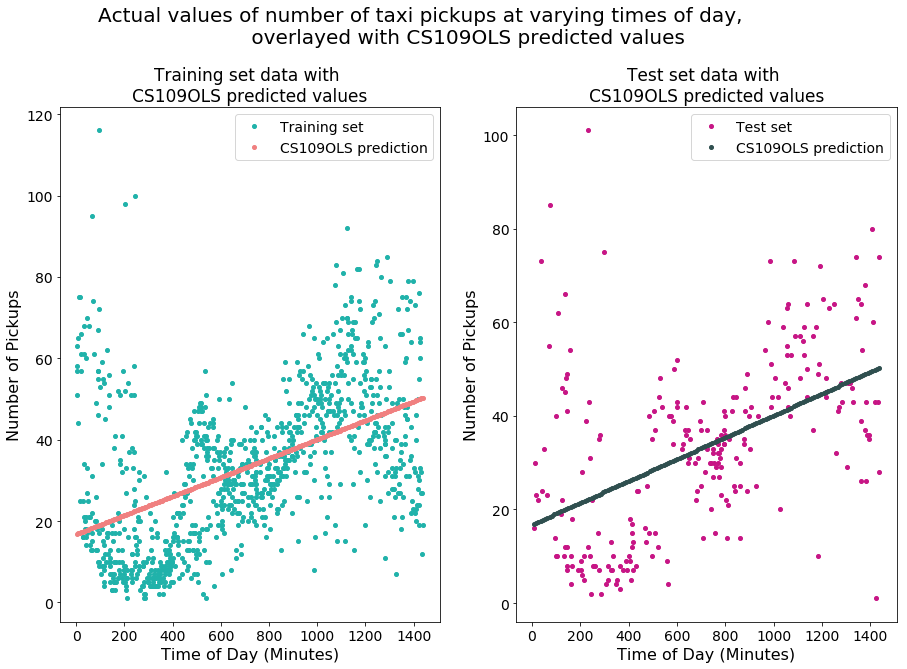

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))

# note: using xtrain_grid generated above when testing the class

xtest_grid = np.linspace(np.min(xtest), np.max(xtest), 150)
Xtest_cs109grid = sm.add_constant(xtest_grid)

pred_train = CS109OLSModel.predict(Xtrain_cs109grid)
pred_test = CS109OLSModel.predict(Xtest_cs109grid)

ax1.plot(xtrain, ytrain, 'o', label = 'Training set', markersize = 4, c = 'lightseagreen')
ax1.plot(xtrain_grid, pred_train, 'o', label = 'CS109OLS prediction', markersize = 4, c = 'lightcoral')
ax1.legend(loc = 'best', fontsize = 14)
ax1.set_xlabel('Time of Day (Minutes)', fontsize = 16); 
ax1.set_ylabel('Number of Pickups', fontsize = 16)
ax1.set_title("Training set data with \nCS109OLS predicted values", fontsize = 17)
ax1.tick_params(labelsize = 14)

ax2.plot(xtest, ytest, 'o', label = 'Test set', markersize = 4, c = 'mediumvioletred')
ax2.plot(xtest_grid, pred_test, 'o', label = 'CS109OLS prediction', markersize = 4, c = 'darkslategrey')
ax2.legend(loc = 'best', fontsize = 14)
ax2.set_xlabel('Time of Day (Minutes)', fontsize = 16); 
ax2.set_ylabel('Number of Pickups', fontsize = 16)
ax2.set_title("Test set data with \nCS109OLS predicted values", fontsize = 17)
ax2.tick_params(labelsize = 14)

fig.suptitle('Actual values of number of taxi pickups at varying times of day, \
             \n overlayed with CS109OLS predicted values',
            fontsize = 20);
    
fig.subplots_adjust(top = 0.84)

When comparing my figure to that of 3.2, they are identical. This is expected if the CS109OLS class and its functions were created correctly!

**4.4**

In [40]:
ypred_train = CS109OLSModel.predict(Xtrain.values)
ypred_train

array([26.17801241, 19.80750944, 18.73409136, 29.32826113, 46.29293385,
       45.73288964, 17.24064012, 43.39937207, 30.49501991, 18.64075066,
       48.39309967, 22.42104912, 16.86727731, 24.3578687 , 29.42160183,
       47.71637957, 28.86155761, 47.36635194, 40.92584344, 46.19959315,
       20.39088884, 26.38802899, 35.39540681, 37.37889674, 35.93211585,
       36.98219875, 34.20531285, 47.6930444 , 43.16602031, 45.68621929,
       34.53200531, 30.72837167, 27.15808979, 38.96568869, 34.99870882,
       42.37262434, 33.59859828, 24.33453353, 44.70614191, 48.08974238,
       39.31571632, 32.03514151, 42.06926705, 25.38461643, 47.59970369,
       44.21610322, 34.04196662, 27.6247933 , 21.65098832, 24.05451142,
       38.75567211, 39.3390515 , 40.66915651, 41.76590977, 21.6743235 ,
       25.38461643, 23.93783554, 20.50756471, 35.53541786, 19.73750392,
       40.87917309, 22.7244064 , 45.87290069, 25.991331  , 22.88775263,
       19.43414663, 48.22975344, 48.67312177, 33.62193345, 18.89

In [41]:
ypred_test = CS109OLSModel.predict(Xtest.values)
ypred_test

array([26.92473803, 26.27135311, 44.49612533, 19.99419085, 34.39199425,
       23.16777474, 21.48764209, 35.27873093, 43.07267961, 48.95314388,
       48.04307203, 19.80750944, 43.35270172, 32.75853195, 49.30317152,
       49.55985845, 32.50184502, 34.08863697, 28.04482646, 34.20531285,
       46.66629667, 21.55764762, 35.62875856, 31.89513045, 33.10855959,
       29.91164052, 49.02314941, 45.45286753, 45.94290622, 43.30603137,
       19.13078935, 17.38065117, 26.83139733, 31.8484601 , 42.90933338,
       36.30547866, 34.08863697, 23.93783554, 32.64185607, 23.47113203,
       21.95434561, 29.30492595, 34.69535153, 37.91560578, 44.89282331,
       44.16943287, 18.96744312, 48.57978107, 24.89457774, 41.67256907,
       17.6373381 , 35.04537917, 23.19110992, 47.31968158, 27.76480435,
       36.14213243, 34.20531285, 31.33508624, 43.35270172, 37.21555051,
       22.30437324, 39.73574948, 40.73916204, 34.83536259, 17.00728836,
       34.99870882, 31.98847115, 34.57867566, 47.17967053, 28.67

In [42]:
r2_train = CS109r2score(ytrain, ypred_train)
r2_train

0.24302603531893352

In [43]:
r2_test = CS109r2score(ytest, ypred_test)
r2_test

0.2406615356157339

In [44]:
print('The CS109r2_score for the training set is {0:6.4f} and the CS109r2_score for the test set is \
{1:6.4f}.'.format(r2_train, r2_test))
print('The two CS109r2_scores are extremely similar. They are identical to the sklearn r2_scores.')

The CS109r2_score for the training set is 0.2430 and the CS109r2_score for the test set is 0.2407.
The two CS109r2_scores are extremely similar. They are identical to the sklearn r2_scores.


**4.5**

In [45]:
beta = CS109OLSModel.params
beta

array([16.75060143,  0.02333518])

In [46]:
print('The slope of the model is {0:7.5f} and the intercept of the model is {1:7.5f}.'.format(beta[1], beta[0]))
print('The parameters from the CS109OLSModel are identical to those of the OLSModel in section 3. This is \
expected if the CS109OLS class and its functions were created appropriately.')

The slope of the model is 0.02334 and the intercept of the model is 16.75060.
The parameters from the CS109OLSModel are identical to those of the OLSModel in section 3. This is expected if the CS109OLS class and its functions were created appropriately.


<div class="exercise"><b> Question 5 </b></div>.

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

**5.1**

In [47]:
df_train = pd.read_csv('outliers_train.csv')
df_train.shape

(53, 2)

In [48]:
df_train.sort_values(by=['X'])

,X,Y
50,-2.110000,320.000000
46,-2.078144,-237.873393
51,-1.991000,303.000000
6,-1.742547,-15.976455
4,-1.491328,-109.710316
9,-1.469421,-207.045450
18,-1.307375,-99.695545
25,-1.269279,-160.108014
42,-1.182903,-213.000722
11,-0.944167,55.239846


*What does a visual inspection of training set tell you about the existence of outliers in the data?*

Upon visual inspection of the training set (and with additional support from the plot below), the relationship between
X and Y appears to be that as X becomes more positive, so does Y (positive correlation). Therefore the outliers in this dataset exist when X is very negative and Y is positive and vice versa (when X is positive and Y is negative). 

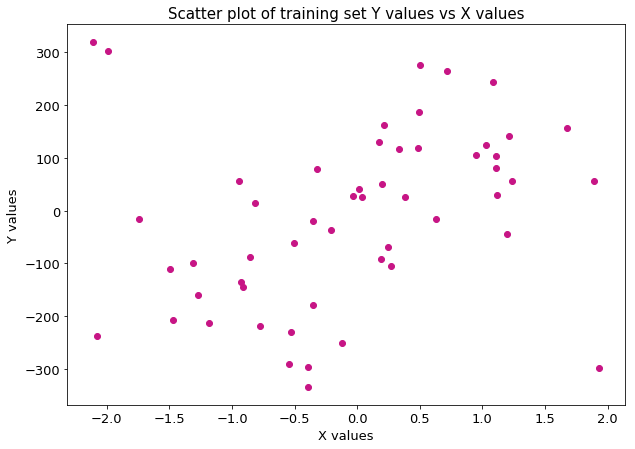

In [49]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))

ax.scatter(df_train.X, df_train.Y, c = 'mediumvioletred')
ax.set_xlabel('X values', fontsize = 13)
ax.set_ylabel('Y values', fontsize = 13)
ax.set_title('Scatter plot of training set Y values vs X values', fontsize = 15)
ax.tick_params(labelsize = 13)

**5.2**

In [50]:
xtrain = df_train.X
ytrain = df_train.Y

In [51]:
Xtrain = sm.add_constant(xtrain)
Xtrain

,const,X
0,1.0,-0.773019
1,1.0,-0.394034
2,1.0,0.630360
3,1.0,-0.350418
4,1.0,-1.491328
5,1.0,-0.119129
6,1.0,-1.742547
7,1.0,1.085502
8,1.0,-0.318393
9,1.0,-1.469421


In [52]:
outliers_sm = OLS(ytrain, Xtrain)
OutlierOLSModel = outliers_sm.fit()

In [53]:
OutlierOLSModel.params

const    -9.506264
X        47.355423
dtype: float64

**5.3**

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*

In [54]:
import scipy as sc

In [55]:
sc.special.comb(53, 50, exact = True)

23426

We will have to calculate the linear regression coefficients ${53\choose 50}$ times or 23,426 times.

**5.4**

In [56]:
def find_outliers_simple(dataset_x, dataset_y) -> list:
    model = OLS(dataset_y, sm.add_constant(dataset_x))
    fitted = model.fit()
    residuals = fitted.resid
    abs_resid = np.absolute(residuals)
    return (np.argsort(abs_resid)[-3:]).tolist()

In [57]:
outlier_indices = find_outliers_simple(xtrain, ytrain)
outlier_indices

[52, 51, 50]

In [58]:
xtrain_free = xtrain.drop(outlier_indices)

In [59]:
ytrain_free = ytrain.drop(outlier_indices)

In [60]:
Xtrain_free = sm.add_constant(xtrain_free)
free_mod = OLS(ytrain_free, Xtrain_free)
OutlierFreeSimpleModel = free_mod.fit()

**5.5**

In [61]:
df_test = pd.read_csv('outliers_test.csv')
df_test.head()

,X,Y
0,-0.573524,-91.080764
1,-0.793911,-19.982576
2,0.788391,118.593685
3,0.489036,64.973804
4,1.530648,178.281580


In [62]:
len(df_test)

50

In [63]:
xtest = df_test.X
ytest = df_test.Y

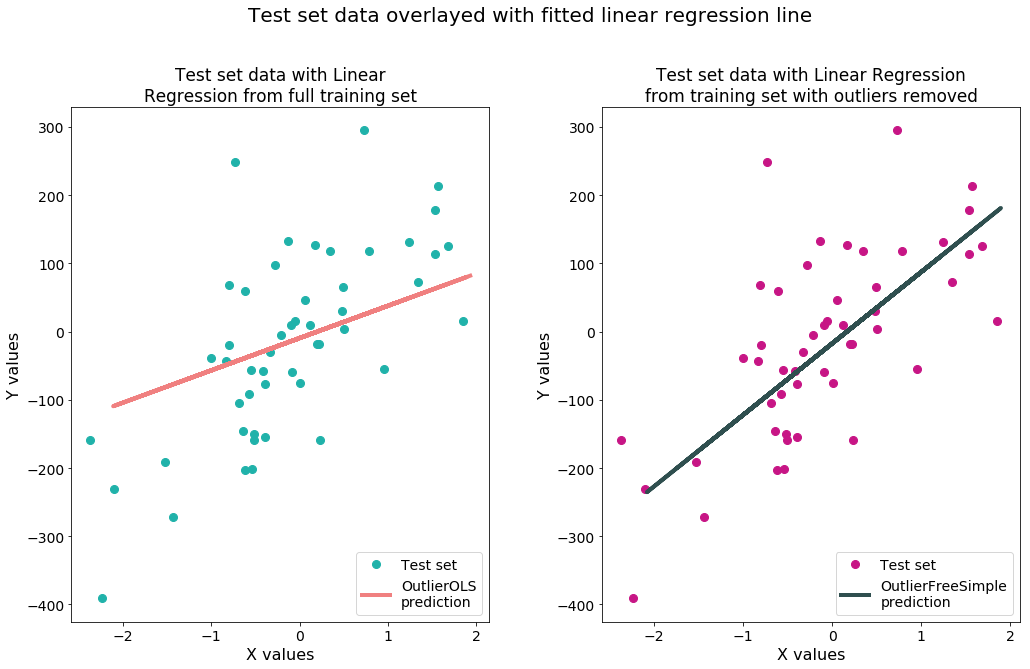

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17, 10))

pred_full = OutlierOLSModel.predict()
pred_no_outliers = OutlierFreeSimpleModel.predict()

ax1.plot(xtest, ytest, 'o', label = 'Test set', markersize = 8, c = 'lightseagreen')
ax1.plot(xtrain, pred_full, label = 'OutlierOLS\nprediction', lw = 4, c = 'lightcoral')
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_xlabel('X values', fontsize = 16); 
ax1.set_ylabel('Y values', fontsize = 16)
ax1.set_title("Test set data with Linear\nRegression from full training set", fontsize = 17)
ax1.tick_params(labelsize = 14)

ax2.plot(xtest, ytest, 'o', label = 'Test set', markersize = 8, c = 'mediumvioletred')
ax2.plot(xtrain_free, pred_no_outliers, lw = 4, label = 'OutlierFreeSimple\nprediction', 
         markersize = 4, c = 'darkslategrey')
ax2.legend(loc = 'lower right', fontsize = 14)
ax2.set_xlabel('X values', fontsize = 16); 
ax2.set_ylabel('Y values', fontsize = 16)
ax2.set_title("Test set data with Linear Regression\nfrom training set with outliers removed", fontsize = 17)
ax2.tick_params(labelsize = 14)

fig.suptitle('Test set data overlayed with fitted linear regression line',
            fontsize = 20);
    
fig.subplots_adjust(top = 0.84, wspace = .27)

Visually, the OutlierFreeSimple model (on the right) fits the test data more closely.

**5.6**

In [65]:
ypred_test_full = OutlierOLSModel.predict(sm.add_constant(xtest))
ypred_test_no_outliers = OutlierFreeSimpleModel.predict(sm.add_constant(xtest))

In [66]:
r2_full = r2_score(ytest, ypred_test_full)
r2_no_outliers = r2_score(ytest,ypred_test_no_outliers)
print('r2_full_set: {0:6.4f}'.format(r2_full))
print('r2_no_outliers: {0:6.4f}'.format(r2_no_outliers))

r2_full_set: 0.3409
r2_no_outliers: 0.4530


The model with the 3 outliers removed produces a better $R^{2}$ score, which is in line with this visually looking like the better model.

**5.7**

When reading the textbook section about outliers, it mentioned "studentized residuals" to standardize the residuals, thereby eliminating whatever units of measurement were used. I used the internal studentized residuals calculation to detect outliers in my algorithm. Most of the information I read on studentized residuals suggested calling anything with a magnitude greater than 3 an outlier. However, after running my function the first time, there were no studentized residuals greater than 3. Therefore, for the purposes of this algorithm and exercise, anything with a magnitude > 2.5 will be deemed an outlier (some resources did mention 2 can be used, although it is conservative). These data didn't return any studentized residuals between 2 and 2.5, so I will not choose 2 as the cutoff. Even if there had been values > 2 and <= 2.5, I don't think I'd choose 2 as the cutoff (vs 2.5) since it would be too conservative and could exclude valid data. 

To show the studentized residuals and the indices, I've created two functions below (instead of one, with the creation of the studentized residuals inside of that).

This function still leads to only 3 outliers.

Resources: 
https://onlinecourses.science.psu.edu/stat501/node/339/ 

https://en.wikipedia.org/wiki/Studentized_residual

In [67]:
def student_resid(dataset_x, dataset_y) -> list:
    '''Take training data and return studentized residuals
    Args: 
        training data, separated into a feature array and a response array
    Returns:
        list of studentized residuals
    '''
    X = sm.add_constant(dataset_x)
    model = OLS(dataset_y, X)  
    fitted = model.fit()
    residuals = fitted.resid
    H = np.dot(np.dot(X, (np.linalg.pinv(np.dot(X.T, X)))), X.T)
    ypred = fitted.predict()
    MSE = (np.sum((dataset_y - ypred)**2))/len(dataset_y)
    studentized = []
    for i, ei in enumerate(residuals):
        result = ei/np.sqrt(MSE*(1-H[i,i]))
        studentized.append(result)
    return studentized

Here are the actual values of studentized residuals, to help explain my rationale above.

In [68]:
student_resid(xtrain, ytrain)

[-1.109222355185576,
 -1.959188907777887,
 -0.23446499015727648,
 -0.9767094771169922,
 -0.19250335346775047,
 -1.5050758401641522,
 0.49870651421725154,
 1.3047988836860587,
 0.6610186382451932,
 -0.8321621392740991,
 0.6702689020904623,
 0.7036665249923285,
 0.3176280565418567,
 -0.15895314108808958,
 -1.710866711821586,
 -0.5790849808786652,
 0.25306858493847467,
 -0.089336063202577,
 -0.1831430383729539,
 0.8370822623276758,
 -1.2529313422768915,
 -0.5915191023489594,
 -0.5877446910218295,
 0.4523387942458207,
 1.533889055894409,
 -0.5855611409338718,
 1.0258236083218526,
 0.6100229994809054,
 1.6740667680982753,
 0.0444551300726687,
 0.39999602626067354,
 0.3278989896255048,
 0.10977854387322375,
 0.3896706728511803,
 0.7095235730625822,
 -1.6353608595210978,
 0.2110287143088507,
 -0.18311260593617984,
 0.5719395940781239,
 -0.239225426560263,
 0.5485471498882978,
 1.1112184363718778,
 -0.9524338501615,
 0.24405645657254446,
 -0.11476151594584247,
 0.0517462342730426,
 -0.86288103

In [69]:
def find_outliers_general(dataset_x, dataset_y) -> list:
    '''Take training data and return indices of outliers
    Args: 
        training data, separated into a feature array (x) and a response array (y)
    Returns:
        list of indices of outliers with studentized residuals with magnitude > 2.5
    '''
    s_residuals = student_resid(dataset_x, dataset_y)
    abs_stud_resid = np.absolute(s_residuals) 
    return (np.argwhere(abs_stud_resid > 2.5)).flatten().tolist()

In [70]:
outlier_indices = find_outliers_general(xtrain, ytrain)
outlier_indices

[50, 51, 52]

In [71]:
xtrain_gen = xtrain.drop(outlier_indices)
ytrain_gen = ytrain.drop(outlier_indices)

In [72]:
Xtrain_gen = sm.add_constant(xtrain_gen)
gen_model = OLS(ytrain_gen, Xtrain_gen)
OutlierFreeGeneralModel = gen_model.fit()

**5.8**

1. *What outliers does it identify?*
    
My algorithm identifies 3 outliers, with the indices 50, 51, and 52.
    
2. *How do those outliers compare to the outliers you found in 5.4?*
    
These outliers are the same ones that I found in 5.4. I chose not to use more stringent criteria than a cutoff of 2.5 in my model since I didn't want to remove data only because the fit wasn't perfect. There could be other features aside from X that contribute to the response Y, so stripping the data of more and more "outliers" won't necessarily create a better model to predict Y. My cutoff is more stringent than what a few resources stated as typical (ie cutoff of 3).
    
3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

The simple model in 5.4 sorted the residuals and chose the indices of the 3 largest residuals, since we were told there were 3 outliers. Those 3 indices were subsequently removed from the training data. The general outlier-free model doesn't assume there is a specific number of outliers. It standardizes the residuals and deems only those standardizations over 2.5 to be outliers. Depending on the dataset, there could be any number of outliers if there are data with studentized residuals > 2.5.

---- 


In [73]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()